In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline 

# Week 1

### Create a DataFrame, ha_costs_df, from the mmd_heart_attack_data.csv file.

* Examine the first 5 rows and the last five rows of the TN heart attack data.
* Check the data types of each column by using .info.
* Keep only the rows where facilities are in TN.
* Print the dimensions of the resulting dataframe.
* How many TN counties are represented in the heart attack costs data?
* How many counties are classified as urban? How many as rural?



In [3]:
# create ha_cost_df from mmd_heart_attack_data.csv
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv')

In [4]:
ha_costs_df.head() # examines first 5 rows of df

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,46509
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,42949
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,50067


In [5]:
ha_costs_df.tail() # examines last 5 rows of df

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2651,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72097,Mayaguez Municipio,PUERTO RICO,Urban,All,undefined,28128
2652,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72113,Ponce Municipio,PUERTO RICO,Urban,All,undefined,26403
2653,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72125,San German Municipio,PUERTO RICO,Urban,All,undefined,26398
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


In [6]:
ha_costs_df.info() # use .info to check datatypes in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 2656 non-null   int64 
 1   geography            2656 non-null   object
 2   measure              2656 non-null   object
 3   adjustment           2656 non-null   object
 4   analysis             2656 non-null   object
 5   domain               2656 non-null   object
 6   condition            2656 non-null   object
 7   primary_sex          2656 non-null   object
 8   primary_age          2656 non-null   object
 9   primary_dual         2656 non-null   object
 10  fips                 2656 non-null   int64 
 11  county               2656 non-null   object
 12  state                2656 non-null   object
 13  urban                2656 non-null   object
 14  primary_race         2656 non-null   object
 15  primary_denominator  2656 non-null   object
 16  analys

In [7]:
ha_costs_tn = ha_costs_df.loc[ha_costs_df['state'] == 'TENNESSEE'] # select rows where facilities are in tn

In [8]:
print(ha_costs_tn.shape) # gives you dimensions of df as (rows, columns)

(91, 17)


In [9]:
ha_costs_tn['county'].nunique() # gives you number of unique values in column 'county'

91

In [10]:
ha_costs_tn['urban'].value_counts() # returns a Series containing counts of unique values
# descending order so that the first element is the most frequently-occurring element. 

Rural    53
Urban    38
Name: urban, dtype: int64

### Create a DataFrame, cancer_costs_df, from the mmd_cancer_data.csv file.

* Look at the head and tail of the DataFrame.
* Keep only the rows where facilities are in TN.
* Print the dimensions of the data. How many TN counties are represented in the cancer costs data?
* You should have found that the datasets have a different number of counties. 
* Bonus: Can you figure out which counties are missing from one of the datasets?

In [11]:
# create cancer_costs_df from mmd_cancer_data.csv
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')

In [12]:
cancer_costs_df.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151
2,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,undefined,19469
3,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,undefined,17234
4,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,undefined,20317


In [13]:
cancer_costs_df.tail()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3160,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72145,Vega Baja Municipio,PUERTO RICO,Urban,All,undefined,7364
3161,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72147,Vieques Municipio,PUERTO RICO,Rural,All,undefined,9987
3162,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72149,Villalba Municipio,PUERTO RICO,Urban,All,undefined,24127
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [14]:
# keep only rows where state = TENNESSEE
cancer_costs_tn = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

In [15]:
print(cancer_costs_tn.shape) #prints (rows,columns)

(95, 17)


In [16]:
cancer_costs_tn['county'].nunique() # 95 counties represented

95

###  Bonus: identify which counties are missing from ha_costs_tn

In [17]:
cancer_costs_tn.loc[~cancer_costs_tn["county"].isin(ha_costs_tn['county'])]['county']

2429      Hancock County
2459        Moore County
2464      Pickett County
2483    Van Buren County
Name: county, dtype: object

### Create a DataFrame, income_df, from the irs_county_2016.csv file.

* Keep only the data that pertains to Tennessee.
* Look at the head and the tail.
* Print the shape.
* Keep only the following columns: ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']
* rename those columns: ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [18]:
income_df = pd.read_csv('../data/irs_county_2016.csv')

In [19]:
income_tn = income_df.loc[income_df['STATE'] == 'TN'] # keep data only in TN

In [20]:
income_tn.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510


In [21]:
income_tn.tail(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


In [22]:
print(income_tn.shape)

(768, 148)


In [23]:
income_tn = income_tn[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1',
                       'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 
                       'A02650', 'N02300', 'A02300']]

In [24]:
income_tn.head(2)

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


In [25]:
# rename columns
income_tn.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

# Week 2

### Look at the distribution of analysis values within the state of Tennessee for both ha_costs_df and cancer_costs_df. Does there appear to be a difference in these distributions for urban counties compared to rural counties?

In [26]:
ha_costs_tn_urban = ha_costs_tn.loc[ha_costs_tn['urban'] == 'Urban']
# You can slice a DataFrame using `.loc` and passing in a conditional expression.

In [27]:
ha_costs_tn_urban.analysis_value.describe()

count       38.000000
mean     45748.921053
std       7109.788921
min      32279.000000
25%      40452.750000
50%      45496.500000
75%      50734.500000
max      61541.000000
Name: analysis_value, dtype: float64

In [28]:
ha_costs_tn_rural = ha_costs_tn.loc[ha_costs_tn['urban'] == 'Rural']

In [29]:
ha_costs_tn_rural.analysis_value.describe()

count       53.000000
mean     45773.075472
std       6232.724885
min      30831.000000
25%      41240.000000
50%      45384.000000
75%      48998.000000
max      62641.000000
Name: analysis_value, dtype: float64

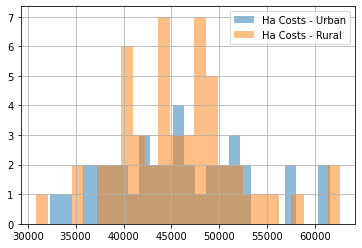

In [30]:
# you can also make a histogram to look at distribution of analysis_value
# uses matplotlib
h = ha_costs_tn.analysis_value[ha_costs_tn.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Ha Costs - Urban')
ha_costs_tn.analysis_value[ha_costs_tn.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Ha Costs - Rural')
h.legend()

In [31]:
cancer_costs_tn_urban = cancer_costs_tn.loc[cancer_costs_tn['urban'] == 'Urban']

In [32]:
cancer_costs_tn_urban.analysis_value.describe()

count       38.000000
mean     19638.605263
std       2712.218435
min      15454.000000
25%      17674.750000
50%      19203.500000
75%      20556.750000
max      27740.000000
Name: analysis_value, dtype: float64

In [33]:
cancer_costs_tn_rural = cancer_costs_tn.loc[cancer_costs_df['urban'] == 'Rural']

In [34]:
cancer_costs_tn_rural.analysis_value.describe()

count       57.000000
mean     19837.421053
std       2255.416100
min      15531.000000
25%      18328.000000
50%      19633.000000
75%      21315.000000
max      25909.000000
Name: analysis_value, dtype: float64

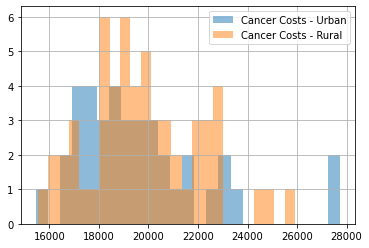

In [35]:
# make a histogram
h = cancer_costs_tn.analysis_value[cancer_costs_tn.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Cancer Costs - Urban')
cancer_costs_tn.analysis_value[cancer_costs_tn.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Cancer Costs - Rural')
h.legend()

### Create income_dict, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions as values
* `('Total', 'Under $1', 'Between 1 and $10,000', 'Between 10,000 and $25,000','Between 25,000 and $50,000', 'Between 50,000 and $75,000', 'Between 75,000 and $100,000', 'Between 100,000 and $200,000', '$200,000 or more')`

In [36]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 
              3: 'Between 10,000 and $25,000',4:'Between 25,000 and $50,000', 
               5:'Between 50,000 and $75,000', 6:'Between 75,000 and $100,000', 
               7:'Between 100,000 and $200,000', 8:'$200,000 or more'}

### Pass the dictionary as an argument to the pandas .replace() method to change the income_bucket column so that it uses descriptive text instead of the numeric code.

In [37]:
income_tn.income_bucket = income_tn.income_bucket.replace(income_dict)

### Create a new dataframe income_county_agg to show totals for each county. 
* Use the pandas groupby() method to group the data by county and get the sum() of all numeric columns for that county.
* Be sure to also reset_index() so that our aggregated data is re-indexed to begin at 0.
* Which county has the greatest number of returns? Does it also have the greatest total income?

In [38]:
income_county_agg = income_tn.groupby('county').sum()

In [41]:
income_county_agg = income_county_agg.reset_index()
income_county_agg.head()

,index,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [40]:
# which county has the greatest number of returns?
income_county_agg = income_county_agg.loc[income_county_agg['county'] != 'Tennessee']
income_county_agg.loc[income_county_agg.return_count.idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

In [67]:
income_county_agg.loc[income_county_agg.agi.idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

# Week 3

### 1. Using the tn_income DataFrame, create a bar plot showing the total number of returns per income bucket for the state of Tennessee. You can get the total numbers for the state by filtering to rows where the county variable is "Tennessee".

In [43]:
income_tn_state = income_tn.loc[income_tn['county'] == 'Tennessee']

/Users/sararamirez/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


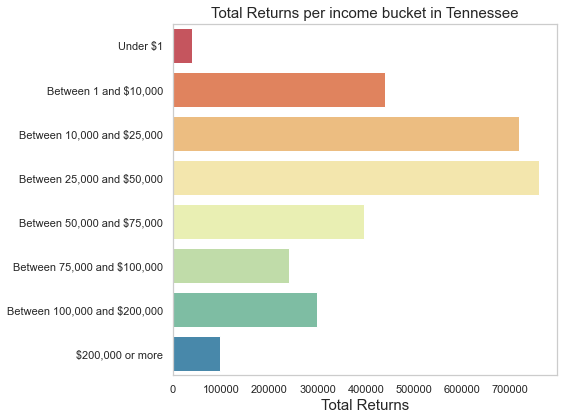

In [45]:
plt.figure(figsize = (8, 6)) # width, height # from matlab
sns.set(style="whitegrid")
sns.barplot('return_count', 'income_bucket', data = income_tn_state, palette = "Spectral") # 'x', 'y', data, palette
plt.xlabel('Total Returns', fontsize=15)
plt.ylabel('')
plt.title('Total Returns per income bucket in Tennessee', fontsize=15)
plt.tight_layout()
plt.grid(False)
plt.savefig('../assets/total_returns_per_incomebucket_tn.png', dpi = 300);

### 2. Create a calculated column in the income_county_agg DataFrame which gives the approximate average household income for each county. Calculate this as 1000*total_inc_amt / return_count.

In [70]:
income_county_agg['approx_avg_income'] = 1000 * income_county_agg['total_inc_amt']/income_county_agg['return_count']

### 3.  Create a histogram showing the distribution of average incomes across all counties in Tennessee. Be sure to remove the Tennessee row prior to creating this histogram

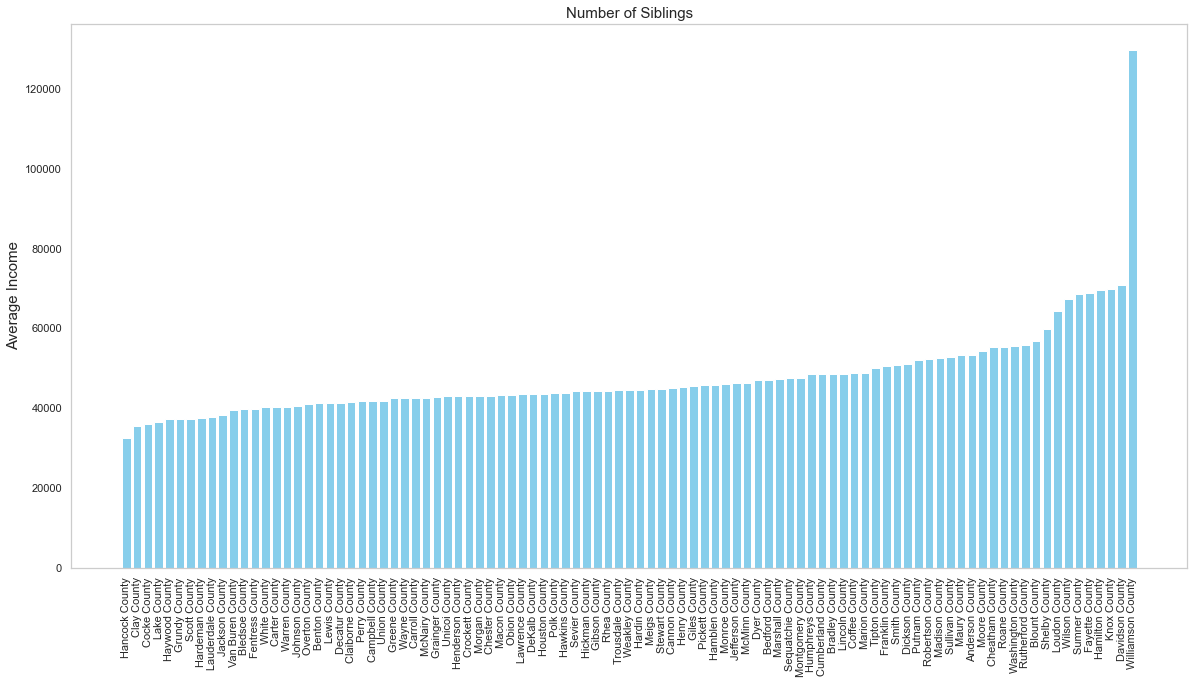

In [71]:
data = income_county_agg.sort_values('approx_avg_income')
plt.figure(figsize = (20,10))
plt.bar('county', 'approx_avg_income', data = data, color = 'skyblue')
plt.xticks(rotation = 90)
plt.ylabel('Average Income', fontsize=15)
plt.grid(False)
plt.title('Number of Siblings', fontsize=15);

In [72]:
income_county_agg

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42556.719023
92,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.315175
93,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40296.554850
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129768.971201


county                       Wilson County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
approx_avg_income                   129769
dtype: object

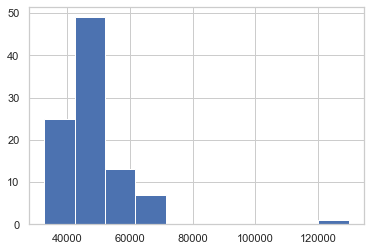

In [73]:
# another way to actually make histogram
# with amount of counties as y-axis, and avg income as x-axis
data = income_county_agg.sort_values('approx_avg_income')
plt.hist('approx_avg_income', data=data)
income_county_agg.max() # will tell you which county has the highest avg income

### For both tn_cancer_costs and tn_ha_costs, create boxplots and swarmplots comparing the distribution of analysis_value for urban counties vs. rural counties. What do you notice?

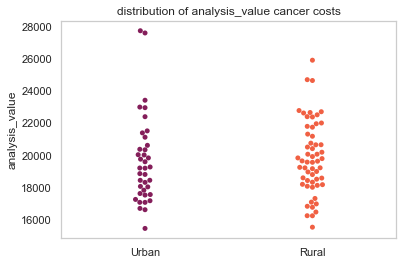

In [74]:
sns.swarmplot(x=cancer_costs_tn.urban, y=cancer_costs_tn.analysis_value, palette = 'rocket')
plt.grid(False)
plt.title('distribution of analysis_value cancer costs')
plt.xlabel('');

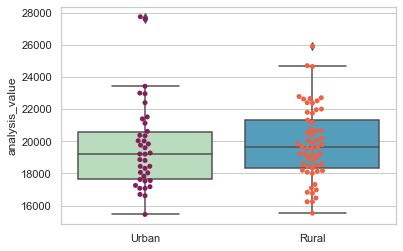

In [75]:
# can overlay swarmplot on boxplot
sns.boxplot(y=cancer_costs_tn.analysis_value, x = cancer_costs_tn.urban, palette = "GnBu" )
sns.swarmplot(x=cancer_costs_tn.urban, y=cancer_costs_tn.analysis_value, palette = 'rocket')
plt.xlabel('');


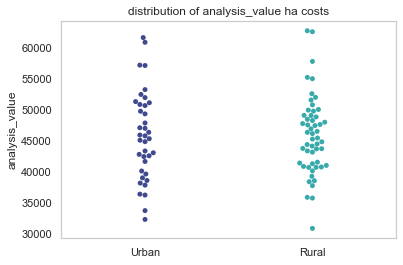

In [76]:
sns.swarmplot(x=ha_costs_tn.urban, y=ha_costs_tn.analysis_value, palette = 'mako')
plt.grid(False)
plt.title('distribution of analysis_value ha costs')
plt.xlabel('');

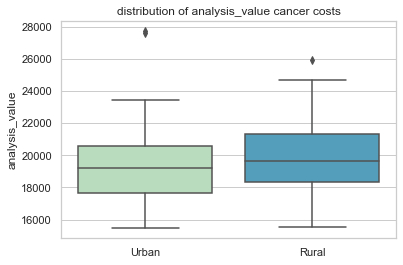

In [77]:
sns.boxplot(y=cancer_costs_tn.analysis_value, x = cancer_costs_tn.urban, palette = "GnBu" )
plt.title('distribution of analysis_value cancer costs')
plt.xlabel('');

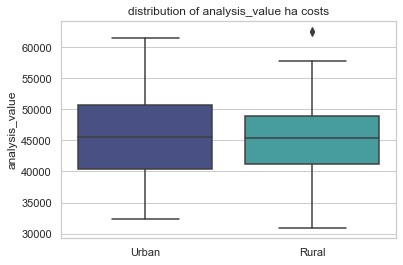

In [78]:
sns.boxplot(y=ha_costs_tn.analysis_value, x = ha_costs_tn.urban, palette = "mako")
plt.title('distribution of analysis_value ha costs')
plt.xlabel('');

# Week 4

2. In the `tn_ha_costs` DataFrame, rename the `analysis_value` column to `ha_avg_cost`. Similarly, in the `tn_cancer_costs` DataFrame, rename the `analysis_value` column to `cancer_avg_cost`

In [79]:
# rename analysis_value to ha_avg_cost
ha_costs_tn = ha_costs_tn.rename(columns = {'analysis_value':'ha_avg_cost'})

In [80]:
# rename analysis_value to ha_avg_cost
cancer_costs_tn = cancer_costs_tn.rename(columns = {'analysis_value':'cancer_avg_cost'})

3. Create a new dataframe, `tn_df` by merging the `county`, `urban`, and `cancer_avg_cost` columns from `tn_cancer_costs` with the `county` and `ha_avg_cost` column from `tn_ha_costs`. Make sure that the resulting DataFrame contains just the counties that are in both `tn_cancer_costs` and `tn_ha_costs`.

In [81]:
# cancer_costs_tn.loc[~cancer_costs_tn.county.isin(ha_costs_tn.county)]
# tells you that there are 4 counties missing in ha_costs_tn

In [84]:
tn_df = pd.merge(cancer_costs_tn[['county', 'urban', 'cancer_avg_cost']], ha_costs_tn[['county', 'ha_avg_cost']], on = 'county', how = 'inner')

In [85]:
#cancer_costs_tn_sub = cancer_costs_tn[['county', 'urban', 'cancer_avg_cost']]
#ha_costs_tn_sub = ha_costs_tn[['county', 'ha_avg_cost']]

In [86]:
tn_df

,county,urban,cancer_avg_cost,ha_avg_cost
0,Anderson County,Urban,15454,42749
1,Bedford County,Rural,19219,43661
2,Benton County,Rural,21315,44423
3,Bledsoe County,Rural,19250,41240
4,Blount County,Urban,17073,38968
...,...,...,...,...
86,Wayne County,Rural,22658,40652
87,Weakley County,Rural,20655,55139
88,White County,Rural,18515,40717
89,Williamson County,Urban,17527,61541


4. Create a scatterplot comparing the average cost of a heart attack to the average cost for cancer for each county. What do you notice?

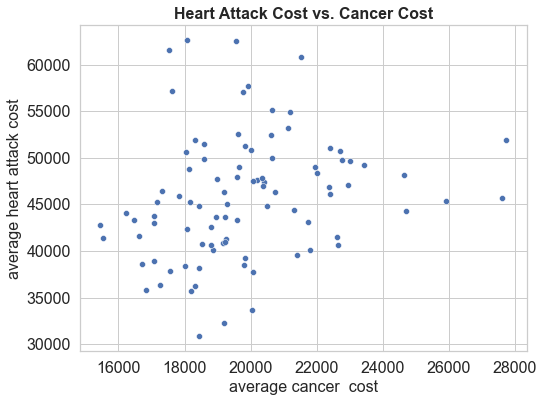

In [87]:
fontsize = 16
plt.figure(figsize = (8,6))
sns.scatterplot(data = tn_df, x = 'cancer_avg_cost', y ='ha_avg_cost', marker = 'o')
plt.xticks(fontsize = fontsize)
plt.xlabel('average cancer  cost', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('average heart attack cost', fontsize = fontsize)
plt.title('Heart Attack Cost vs. Cancer Cost', fontsize = fontsize, fontweight = 'bold');

5. Merge the avg_income column from income_county_agg with tn_df and save the result back to tn_df. Create two new columns, ha_cost_income_ratio and cancer_cost_income_ratio by dividing ha_avg_cost and cancer_avg_cost respectively by avg_income

In [88]:
income_county_agg

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.385535
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47127.581262
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41296.671710
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39743.640351
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.162888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42556.719023
92,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.315175
93,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40296.554850
94,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129768.971201


In [89]:
tn_df

,county,urban,cancer_avg_cost,ha_avg_cost
0,Anderson County,Urban,15454,42749
1,Bedford County,Rural,19219,43661
2,Benton County,Rural,21315,44423
3,Bledsoe County,Rural,19250,41240
4,Blount County,Urban,17073,38968
...,...,...,...,...
86,Wayne County,Rural,22658,40652
87,Weakley County,Rural,20655,55139
88,White County,Rural,18515,40717
89,Williamson County,Urban,17527,61541


In [90]:
tn_df = pd.merge(tn_df, income_county_agg[['county', 'approx_avg_income']], how ='inner')

In [91]:
tn_df.head(2)

,county,urban,cancer_avg_cost,ha_avg_cost,approx_avg_income
0,Anderson County,Urban,15454,42749,53382.385535
1,Bedford County,Rural,19219,43661,47127.581262


Create two new columns, ha_cost_income_ratio and cancer_cost_income_ratio by dividing ha_avg_cost and cancer_avg_cost respectively by avg_income

In [92]:
tn_df['ha_cost_income_ratio'] = tn_df['ha_avg_cost']/tn_df['approx_avg_income']

In [93]:
tn_df['cancer_cost_income_ratio'] = tn_df['cancer_avg_cost']/tn_df['approx_avg_income']

In [94]:
tn_df.head(2)

,county,urban,cancer_avg_cost,ha_avg_cost,approx_avg_income,ha_cost_income_ratio,cancer_cost_income_ratio
0,Anderson County,Urban,15454,42749,53382.385535,0.800807,0.289496
1,Bedford County,Rural,19219,43661,47127.581262,0.926443,0.407808


### Create two choropleths showing the cost income ratios you calculated in the previous part. What do you notice?

In [95]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [96]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


In [97]:
counties.shape

(95, 6)

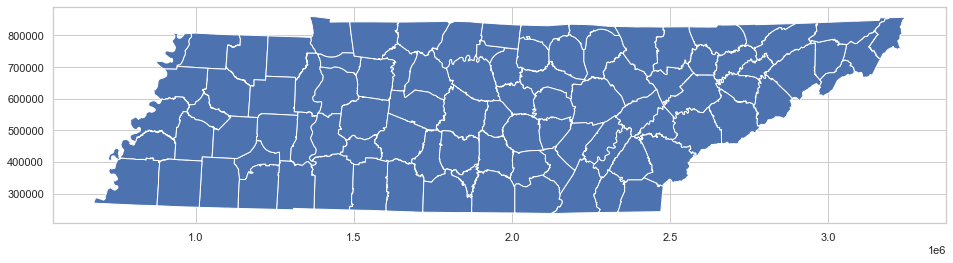

In [98]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(ax = ax);

In [99]:
county_name = list(counties.NAME)

In [100]:
county_name_fixed = []
for i in range(len(county_name)):
    county_name_fixed.append(county_name[i] + ' County')

In [101]:
counties['county'] = county_name_fixed

In [102]:
counties_merged = pd.merge(left = counties, right = tn_df, left_on = 'county', right_on = 'county')
counties_merged.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,urban,cancer_avg_cost,ha_avg_cost,approx_avg_income,ha_cost_income_ratio,cancer_cost_income_ratio
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester County,Urban,23421,49264,43147.147147,1.141767,0.542817
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,Rural,22658,40652,42556.719023,0.955243,0.532419
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton County,Urban,22398,51058,50067.311339,1.019787,0.447358
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton County,Urban,19272,45021,69608.265822,0.646777,0.276864
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart County,Urban,27740,51882,44939.279279,1.154491,0.617277


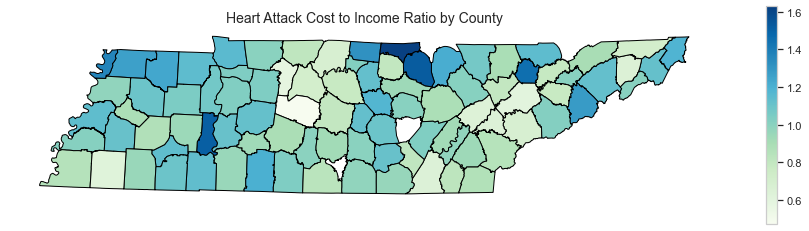

In [103]:
fig, ax = plt.subplots(figsize=(16,4))
counties_merged.plot(column = 'ha_cost_income_ratio', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Heart Attack Cost to Income Ratio by County', fontsize = 14)
ax.axis('off');

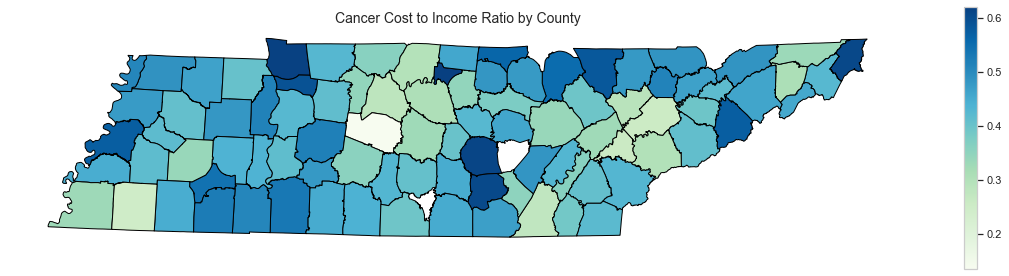

In [106]:
fig, ax = plt.subplots(figsize=(16,4))
counties_merged.plot(column = 'cancer_cost_income_ratio', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Cancer Cost to Income Ratio by County', fontsize = 14)
ax.axis('off')
plt.tight_layout()
plt.savefig('../assets/cancer_cost_income_ratio_tncounty.png', dpi = 300);

# Week 5

Building a Classifier
- Overview of Machine Learning
- Feature Engineering
- One hot encoding to encode categorical variables for use in a model
- Creating training and test data

 ### CODING TASKS
 - What does the exploratory data analysis suggest about our question?
 - Build a model that will predict whether the average cost for cancer care is above the average cost or equal to or below the average cost.
 - To train a model, we will want to get more that just the Tennessee data. Make a copy of your notebook and then remove the `TENNESSEE` filters for the cancer, heart attack, and income data. **Be sure to use state and county for any aggregations.** 
   - You can remove the cells for creating visualizations from this new notebook
   - You will need to use the `state_abbrev.csv` file, which lists state names and their 2-character abbreviations, to map the state names in the cancer and heart attack data to their abbreviations **prior** to merging with the income data. The code for mapping will look something like this:
      ```
   state_abbrev=pd.read_csv('../data/state_abbrev.csv')  
   
   ha_costs['state']=ha_costs.state.map(state_abbrev.set_index('name')['abbrev'].to_dict())
   ```
- Create your target variable (whether cancer cost is above or below the mean)
- What are your predictors?
    - Use `pd.get_dummies()` with your explanatory variables to encode any categorical values. Features for your model must be numeric.
     - Split the data into train and test sets.
    - Build and evaluate a logistic regression model.
 - Think about other potential features that might explain cost disparities. Can you find additional data that may improve your model? The number of healthcare providers in a county, the number of healthcare facilities in a county, unemployment rates, or the per-person-income (which can be approximated using the number of exemptions in the IRS data) are potential features. Can you think of others?

look at cost income ratio